### 영상의 속성 및 픽셀 값 참조

In [2]:
import sys
import cv2


# 영상 불러오기
img1 = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)

if img1 is None or img2 is None:
    print('Image load failed!')
    sys.exit()

# 영상의 속성 참조
print('type(img1):', type(img1))
print('img1.shape:', img1.shape)
print('img2.shape:', img2.shape)
print('img1.dtype:', img1.dtype)

type(img1): <class 'numpy.ndarray'>
img1.shape: (480, 640)
img2.shape: (480, 640, 3)
img1.dtype: uint8


In [4]:
# 영상의 크기 참조
h, w = img2.shape[:2]
print('img2 size: {} x {}'.format(w, h))

if len(img1.shape) == 2:
    print('img1 is a grayscale image')
elif len(img1.shape) == 3:
    print('img1 is a truecolor image')

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey()

cv2.destroyAllWindows()

img2 size: 640 x 480
img1 is a grayscale image


In [5]:
# 영상의 픽셀 값 참조
for y in range(h):  # 비효율적임
    for x in range(w):
        img1[y, x] = 255   # (h, w) - (x, y)
        img2[y, x] = (0, 0, 255)        

# img1[:,:] = 255
# img2[:,:] = (0, 0, 255)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.waitKey()

cv2.destroyAllWindows()

* 영상 표현과 좌표계

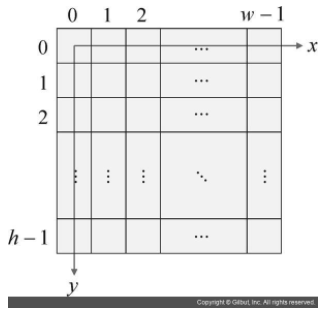

### 영상의 생성, 복사, 부분 영상 추출

In [9]:
# 영상 복사
img1 = cv2.imread('HappyFish.jpg')

img2 = img1
img3 = img1.copy()  # 사본 만들기, img3에 변경을 해도 img1은 변경되지 않음

img1.fill(255)  # img2도 변경됨, img3는 변경 x

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# 부분 영상 추출
img1 = cv2.imread('HappyFish.jpg')

img2 = img1[40:120, 30:150]  # numpy.ndarray의 슬라이싱 (y, x)
img3 = img1[40:120, 30:150].copy()

img2.fill(0)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey()
cv2.destroyAllWindows()

### 마스크 연산과 ROI

* Region of Interest
* 영상에서 특정 연산을 수행하고자 하는 임의의 부분 영역

**마스크 연산**

* 마스크 영상의 픽셀 값이 0이 아닌 위치에서만 연산이 수행됨 (0또는 255로 구성된 이진 영상 사용)

**마스크 연산을 지원하는 픽셀 값 복사 코드**

cv2.copyTo(src, mask, dst=None) => dst

* src : 입력 영상
* mask : 마스크 영상. 0이 아닌 픽셀에 대해서만 복사 연산 수행
* dst : src와 크기, 타입이 같은 dst를 입력으로 지정하면 dst를 새로 생성하지 않고 연산 수행

In [15]:
import sys
import cv2


# 마스크 영상을 이용한 영상 합성
src = cv2.imread('airplane.bmp', cv2.IMREAD_COLOR)  
mask = cv2.imread('mask_plane.bmp', cv2.IMREAD_GRAYSCALE)  # src영상에서 비행기가 있는 위치만 픽셀값이 255
dst = cv2.imread('field.bmp', cv2.IMREAD_COLOR)

if src is None or mask is None or dst is None:
    print('Image load failed!')
    sys.exit()

cv2.copyTo(src, mask, dst)  # mask 영상에서 흰색으로 표현된 위치에서만 src 영상의 픽셁삾이 dst로 복사됨
# dst[mask > 0] = src[mask > 0]

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [29]:
print(mask.shape)
print(src.shape)
print(dst.shape)

(400, 600)
(400, 600, 3)
(400, 600, 3)


In [16]:
mask > 0  # 비행기가 있는 위치

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [24]:
src[mask > 0]  # src에서 비행기가 있는 위치

array([[190, 145, 154],
       [166, 124, 134],
       [144, 101, 113],
       ...,
       [106,  49,  73],
       [138,  87, 114],
       [188, 140, 170]], dtype=uint8)

In [18]:
dst[mask > 0]  # dst에서 비행기가 위치할 위치

array([[190, 145, 154],
       [166, 124, 134],
       [144, 101, 113],
       ...,
       [106,  49,  73],
       [138,  87, 114],
       [188, 140, 170]], dtype=uint8)

In [19]:
dst[mask > 0] = src[mask > 0]

In [33]:
# 알파 채널을 마스크 영상으로 이용
src = cv2.imread('cat.bmp', cv2.IMREAD_COLOR)
logo = cv2.imread('opencv-logo-white.png', cv2.IMREAD_UNCHANGED) # (b, g, r, a) 4채널

if src is None or logo is None:
    print('Image load failed!')
    sys.exit()

mask = logo[:, :, 3]    # mask는 알파 채널로 만든 마스크 영상
logo = logo[:, :, :-1]  # logo는 b, g, r 3채널로 구성된 컬러 영상
h, w = mask.shape[:2]
crop = src[10:10+h, 10:10+w]  # logo, mask와 같은 크기의 부분 영상 추출

cv2.copyTo(logo, mask, crop)  # crop에 작업해도 src에 변경 사항이 반영됨
#crop[mask > 0] = logo[mask > 0]

cv2.imshow('crop', crop)
cv2.imshow('src', src)
cv2.imshow('logo', logo)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()

### 그리기 도구

In [35]:
import numpy as np
import cv2

img = np.full((400, 400, 3), 255, np.uint8)

cv2.line(img, (50, 50), (200, 50), (0, 0, 255), 5)
cv2.line(img, (50, 60), (150, 160), (0, 0, 128))

cv2.rectangle(img, (50, 200, 150, 100), (0, 255, 0), 2)  # (x, y, w, h)
cv2.rectangle(img, (70, 220), (180, 280), (0, 128, 0), -1)  # 왼쪽 하단 꼭짓점, 오른쪽 상단 꼭짓점

cv2.circle(img, (300, 100), 30, (255, 255, 0), -1, cv2.LINE_AA)
cv2.circle(img, (300, 100), 60, (255, 0, 0), 3, cv2.LINE_AA)

pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts], True, (255, 0, 255), 2)

text = 'Hello? OpenCV ' + cv2.__version__
cv2.putText(img, text, (50, 350), cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
            (0, 0, 255), 1, cv2.LINE_AA)

cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()


### 카메라와 동영상 처리

In [37]:
import sys
import cv2


# 카메라 열기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Camera open failed!")
    sys.exit()

# 카메라 프레임 크기 출력
print('Frame width:', int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# 카메라 프레임 처리
while True:
    ret, frame = cap.read()

    if not ret:
        break

    inversed = ~frame  # 반전

    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)

    if cv2.waitKey(10) == 27:
        break

cap.release()
cv2.destroyAllWindows()

Frame width: 640
Frame height: 480


In [38]:
import sys
import cv2


# 비디오 파일 열기
cap = cv2.VideoCapture('C:/Users/ky_moon/Desktop/vision/ch02/video1.mp4')

if not cap.isOpened():
    print("Video open failed!")
    sys.exit()

# 비디오 프레임 크기, 전체 프레임수, FPS 등 출력
print('Frame width:', int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame count:', int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

fps = cap.get(cv2.CAP_PROP_FPS)
print('FPS:', fps)

delay = round(1000 / fps)

# 비디오 매 프레임 처리
while True:
    ret, frame = cap.read()

    if not ret:
        break

    inversed = ~frame  # 반전

    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)

    if cv2.waitKey(delay) == 27:
        break

cap.release()
cv2.destroyAllWindows()

Frame width: 1280
Frame height: 720
Frame count: 85
FPS: 24.0


In [39]:
import sys
import cv2


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Camera open failed!")
    sys.exit()

w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'DIVX') # *'DIVX' == 'D', 'I', 'V', 'X'
delay = round(1000 / fps)

out = cv2.VideoWriter('C:/Users/ky_moon/Desktop/vision/ch02/output.avi', fourcc, fps, (w, h))

if not out.isOpened():
    print('File open failed!')
    cap.release()
    sys.exit()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    inversed = ~frame

    out.write(inversed)

    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)

    if cv2.waitKey(delay) == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [41]:
import sys
import numpy as np
import cv2


img = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)

if img is None:
    print('Image load failed!')
    sys.exit()

cv2.namedWindow('image')
cv2.imshow('image', img)

while True:
    keycode = cv2.waitKey()
    if keycode == ord('i') or keycode == ord('I'):  # i를 누르면 영상 반전
        img = ~img
        cv2.imshow('image', img)
    elif keycode == 27:
        break

cv2.destroyAllWindows()

### 마우스 이벤트 처리

In [47]:
import sys
import numpy as np
import cv2


oldx = oldy = -1

def on_mouse(event, x, y, flags, param):  # 마우스 이벤트 처리 함수(콜백 함수)
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:  # 마우스 클릭 on (1)
        print(flags)
        oldx, oldy = x, y
        print('EVENT_LBUTTONDOWN: %d, %d' % (x, y))

    elif event == cv2.EVENT_LBUTTONUP:  # 마우스 클릭 off
        print('EVENT_LBUTTONUP: %d, %d' % (x, y))

    elif event == cv2.EVENT_MOUSEMOVE:  # 마우스가 창 위에서 움직임
        if flags & cv2.EVENT_FLAG_LBUTTON:  # 마우스 왼쪽 버튼이 눌려져 있음 (1)
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 4, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y


img = np.ones((480, 640, 3), dtype=np.uint8) * 255

cv2.namedWindow('image')
cv2.setMouseCallback('image', on_mouse, img)  # 콜백 함수 파라미터로 img전달

cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()

1
EVENT_LBUTTONDOWN: 167, 302
EVENT_LBUTTONUP: 469, 107


### 트랙바

In [49]:
import numpy as np
import cv2


def on_level_change(pos):  # 콜백 함수
    value = pos * 16
    if value >= 255:
        value = 255

    img[:] = value
    cv2.imshow('image', img)


img = np.zeros((480, 640), np.uint8)
cv2.namedWindow('image')
cv2.createTrackbar('level', 'image', 0, 16, on_level_change)  # 트랙바 위치가 변경될 때 마다 콜백 함수 호출

cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()

### 동영상 전환 이펙트

In [50]:
import sys
import numpy as np
import cv2


# 두 개의 동영상을 열어서 cap1, cap2로 지정
cap1 = cv2.VideoCapture('C:/Users/ky_moon/Desktop/vision/ch02/video1.mp4')
cap2 = cv2.VideoCapture('C:/Users/ky_moon/Desktop/vision/ch02/video2.mp4')

if not cap1.isOpened() or not cap2.isOpened():
    print('video open failed!')
    sys.exit()

# 두 동영상의 크기, FPS는 같다고 가정함
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap1.get(cv2.CAP_PROP_FPS)
effect_frames = int(fps * 2)

print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)
print('FPS:', fps)

delay = int(1000 / fps)

w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# 출력 동영상 객체 생성
out = cv2.VideoWriter('C:/Users/ky_moon/Desktop/vision/ch02/output.avi', fourcc, fps, (w, h))

# 1번 동영상 복사
for i in range(frame_cnt1 - effect_frames):
    ret1, frame1 = cap1.read()

    if not ret1:
        print('frame read error!')
        sys.exit()

    out.write(frame1)
    print('.', end='')

    cv2.imshow('output', frame1)
    cv2.waitKey(delay)

# 1번 동영상 뒷부분과 2번 동영상 앞부분을 합성
for i in range(effect_frames):
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()

    if not ret1 or not ret2:
        print('frame read error!')
        sys.exit()

    dx = int(w / effect_frames) * i

    frame = np.zeros((h, w, 3), dtype=np.uint8)
    frame[:, 0:dx, :] = frame2[:, 0:dx, :]
    frame[:, dx:w, :] = frame1[:, dx:w, :]

    #alpha = i / effect_frames
    #frame = cv2.addWeighted(frame1, 1 - alpha, frame2, alpha, 0)

    out.write(frame)
    print('.', end='')

    cv2.imshow('output', frame)
    cv2.waitKey(delay)

# 2번 동영상을 복사
for i in range(effect_frames, frame_cnt2):
    ret2, frame2 = cap2.read()

    if not ret2:
        print('frame read error!')
        sys.exit()

    out.write(frame2)
    print('.', end='')

    cv2.imshow('output', frame2)
    cv2.waitKey(delay)

print('\noutput.avi file is successfully generated!')

cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

frame_cnt1: 85
frame_cnt2: 121
FPS: 24.0
..............................................................................................................................................................
output.avi file is successfully generated!
